## Online Retail - II Dataset

The Online Retail - II dataset provides insights into the sales events of an online store from December 1, 2009, to December 9, 2011. This dataset consists a wide range of gift products, primarily targeting corporate customers.

## Objective

The development of user focused marketing strategies by leveraging RFM (Recency, Frequency, Monetary) Analysis, so as to gain deeper insights into customer behavior buying patterns and preferences. This will help to improve customer engagements targeted marketing and personalized campaigns.

This is for learning how to use Python’s RFM (Recency, Frequency, Monetary) analysis to group customers based on their shopping habits practise purposes and reference is taken from Hasan Hüseyin Coşgun Medium blog on customer segmentation using RFM analysis.



## Methodology

1. Recency: How recent a customer made a purchase?
2. Frequency: How often does a customer buy an item?
3. Monetary: How much does a customer spend?

In [1]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

# Filter warnings using ignore parameter
warnings.filterwarnings('ignore')

# Uses 'None' to show all columns and rows.
# Limits decimal numbers to three digits.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%3f' %x)

In [3]:
df1 = pd.read_excel(r"C:\Users\Jannet\OneDrive\Documents\Data Science Study\Projects\RFM Analysis\online_retail_II.xlsx", sheet_name="Year 2009-2010")

In [4]:
df = df1.copy()
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate    Price  Customer ID         Country  
0 2009-12-01 07:45:00 6.950000 13085.000000  United Kingdom  
1 2009-12-01 07:45:00 6.750000 13085.000000  United Kingdom  
2 2009-12-01 07:45:00 6.750000 13085.000000  United Kingdom  
3 2009-12-01 07:45:00 2.100000 13085.000000  United Kingdom  
4 2009-12-01 07:45:00 1.250000 13085.000000  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key):
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum())) / len(dataset[key]) * 100, columns=['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(
        x=null_feat.index,
        y=null_feat['Count'],
        opacity=0.8,
        text=percentage_null['Count'],
        textposition='auto',
        marker=dict(
            color='#7EC0EE',  # Change the color of bars
            line=dict(
                color='#000000',
                width=1.5
            )
        ),
        width=0.5,  # Adjust the width of bars
    )

    layout = dict(title="Missing Values (count & %)", plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
                  xaxis=dict(title="Features"), yaxis=dict(title="Count"))

    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)

In [8]:
#How many different unique products ?
df["Description"].nunique()

4681

1. Top 10 most popular products?

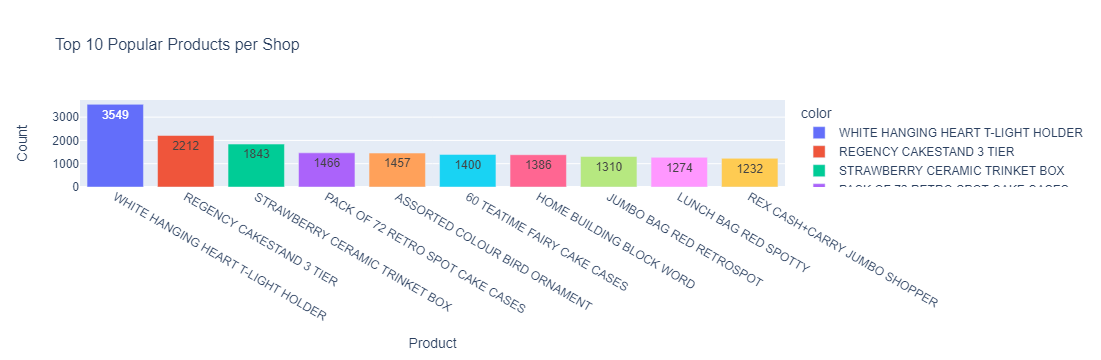

In [9]:
most_popular_products =  df['Description'].value_counts()[:10]

# Create bar plot
fig = px.bar(x=most_popular_products.index,
             y=most_popular_products.values,
             color=most_popular_products.index,
             text=most_popular_products.values,
             title="Top 10 Popular Products per Shop",
             labels={'x': 'Product', 'y': 'Count'})
# Update layout
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
    
)
fig.show()

2. Top 10 countries with highest customers?

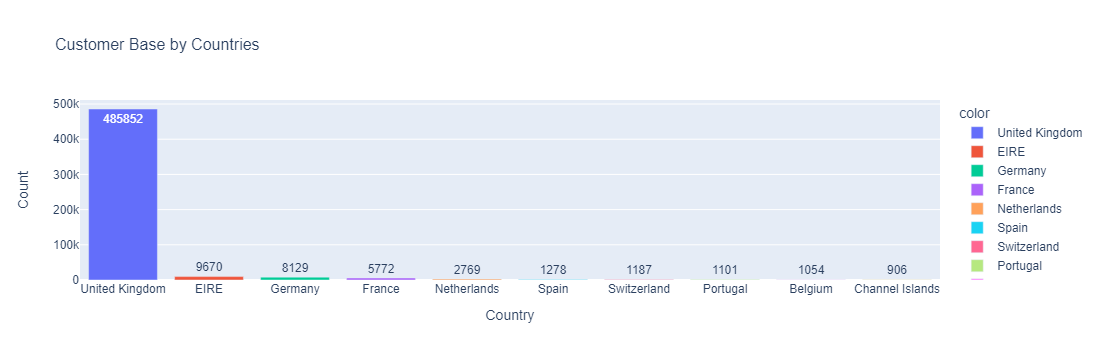

In [10]:
countries = df['Country'].value_counts()[:10]

#Create bar plot
fig = px.bar(x=countries.index,
             y=countries.values,
             color=countries.index,
             text=countries.values,
             title="Customer Base by Countries",
             labels={'x': 'Country', 'y': 'Count'})
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)
fig.show()

UK has the highest users in comparison to other countries.

3. Quantity of each products purchased in total?

In [11]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False)

Quantity
Description                                  
WHITE HANGING HEART T-LIGHT HOLDER      57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS       54698
BROCADE RING PURSE                      47647
PACK OF 72 RETRO SPOT CAKE CASES        46106
ASSORTED COLOUR BIRD ORNAMENT           44925
60 TEATIME FAIRY CAKE CASES             36326
PACK OF 60 PINK PAISLEY CAKE CASES      31822
JUMBO BAG RED RETROSPOT                 30727
SMALL POPCORN HOLDER                    29500
STRAWBERRY CERAMIC TRINKET BOX          26563
BLACK AND WHITE PAISLEY FLOWER MUG      25701
PACK OF 72 SKULL CAKE CASES             25516
PACK OF 12 SUKI TISSUES                 25179
GIRLS ALPHABET IRON ON PATCHES          23827
COLOUR GLASS T-LIGHT HOLDER HANGING     23730
PACK OF 12 RED SPOTTY TISSUES           22699
PACK OF 12 PINK PAISLEY TISSUES         21928
72 SWEETHEART FAIRY CAKE CASES          21798
ASSTD DESIGN BUBBLE GUM RING            21256
PACK OF 12 WOODLAND TISSUES             20966
ASSORTED COLOURS SILK FAN               20474
JUMBO BAG STRAWBERRY                    19985
HANGING JAM JAR T-LIGHT HOLDER          19774
PACK OF 60 DINOSAUR CAKE CASES          19187
FLAG OF ST GEORGE CAR FLAG              18913
ANTIQUE SILVER TEA GLASS ETCHED         18700
BOYS ALPHABET IRON ON PATCHES           18536
HANGING HEART ZINC T-LIGHT HOLDER       17988
MINI PAINT SET VINTAGE                  17687
LUNCH BAG RED SPOTTY                    17608
JUMBO  BAG BAROQUE BLACK WHITE          17312
PAPER CHAIN KIT 50'S CHRISTMAS          17083
SMALL CHINESE STYLE SCISSOR             17042
PACK OF 12 HEARTS DESIGN TISSUES        16797
VICTORIAN GLASS HANGING T-LIGHT         15884
JUMBO STORAGE BAG SUKI                  15795
RED  HARMONICA IN BOX                   15437
SET/20 RED SPOTTY PAPER NAPKINS         15067
JUMBO SHOPPER VINTAGE RED PAISLEY       15044
RED TOADSTOOL LED NIGHT LIGHT           14902
JUMBO BAG PINK VINTAGE PAISLEY          14897
ASSORTED FLOWER COLOUR "LEIS"           14414
JUMBO BAG SCANDINAVIAN PAISLEY          14280
ZINC METAL HEART DECORATION             14240
JUMBO BAG PINK WITH WHITE SPOTS         14192
GRAND CHOCOLATECANDLE                   14163
JUMBO BAG RED WHITE SPOTTY              14066
PACK OF 12 LONDON TISSUES               13980
LUNCH BAG  BLACK SKULL.                 13803
MINI HIGHLIGHTER PENS                   13801
SET/6 WOODLAND PAPER CUPS               13732
SET/6 WOODLAND PAPER PLATES             13700
ROTATING SILVER ANGELS T-LIGHT HLDR     13675
SWEETHEART CERAMIC TRINKET BOX          13538
PACK OF 72 RETROSPOT CAKE CASES         13305
VINTAGE SNAP CARDS                      13296
SET/6 STRAWBERRY PAPER CUPS             13268
PACK OF 60 SPACEBOY CAKE CASES          13147
REGENCY CAKESTAND 3 TIER                13093
SET/6 STRAWBERRY PAPER PLATES           12822
PLACE SETTING WHITE HEART               12722
RED SPOTS  WRAP                         12675
LUNCH BAG SUKI  DESIGN                  12459
60 CAKE CASES VINTAGE CHRISTMAS         12449
LUNCH BAG CARS BLUE                     12149
MULTI COLOUR SILVER T-LIGHT HOLDER      12052
PINK CREAM FELT CRAFT TRINKET BOX       11926
PACK OF 6 BIRDY GIFT TAGS               11753
WOODLAND CHARLOTTE BAG                  11615
SINGLE HEART ZINC T-LIGHT HOLDER        11594
HEART FILIGREE DOVE  SMALL              11520
RED SPOTTY CHARLOTTE BAG                11478
LUNCH BAG WOODLAND                      11477
BAG 250g SWIRLY MARBLES                 11463
BOX OF 24 COCKTAIL PARASOLS             11403
JAZZ HEARTS MEMO PAD                    10967
HEART OF WICKER SMALL                   10961
PLEASE ONE PERSON METAL SIGN            10917
WRAP PINK FAIRY CAKES                   10815
PACK OF 12 SKULL TISSUES                10642
SET/6 RED SPOTTY PAPER PLATES           10641
PINK BLUE FELT CRAFT TRINKET BOX        10378
SET/5 RED SPOTTY LID GLASS BOWLS        10148
CHINESE DRAGON PAPER LANTERNS           10138
CHARLOTTE BAG SUKI DESIGN               10110
PARTY BUNTING                      

4. How many invoices have been issued?

In [12]:
df['Invoice'].nunique()

28816

In [13]:
# Calculate total cost per invoice
df['TotalPrice'] = df['Quantity'] *df['Price']

In [14]:
# Desc order of how much was each invoice?
df.groupby("Invoice").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending=False).head()

TotalPrice
Invoice             
533027  49844.990000
531516  45332.970000
493819  44051.600000
524181  33167.800000
526934  26007.080000

## Data Prep

In [15]:
# Delete rows without customer ID
df.dropna(inplace=True)

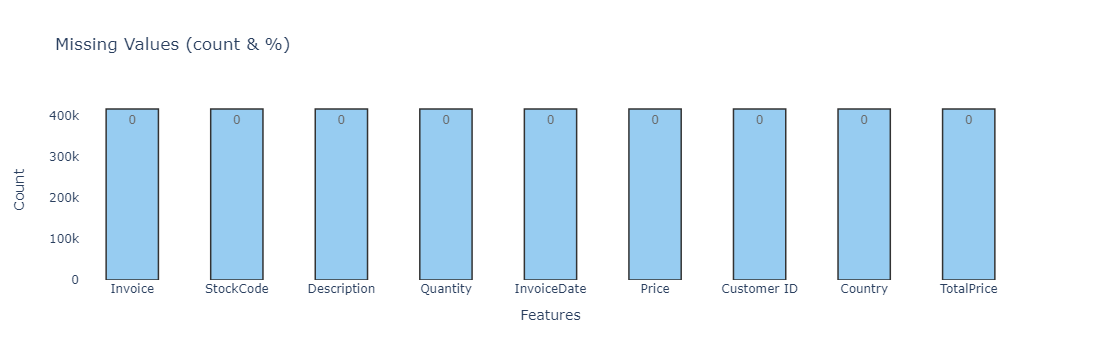

In [16]:
missing_plot(df, 'Customer ID')

In [17]:
df.shape

(417534, 9)

In [18]:
df.describe().T

count                           mean                  min  \
Quantity    417534.000000                      12.758815         -9360.000000   
InvoiceDate        417534  2010-07-01 01:12:19.787609856  2009-12-01 07:45:00   
Price       417534.000000                       3.887547             0.000000   
Customer ID 417534.000000                   15360.645478         12346.000000   
TotalPrice  417534.000000                      19.994081        -25111.090000   

                             25%                  50%                  75%  \
Quantity                2.000000             4.000000            12.000000   
InvoiceDate  2010-03-26 11:26:00  2010-07-08 19:12:00  2010-10-14 14:08:00   
Price                   1.250000             1.950000             3.750000   
Customer ID         13983.000000         15311.000000         16799.000000   
TotalPrice              4.250000            11.250000            19.350000   

                             max         std  
Quantity            19152.000000  101.220424  
InvoiceDate  2010-12-09 20:01:00         NaN  
Price               25111.090000   71.131797  
Customer ID         18287.000000 1680.811316  
TotalPrice          15818.400000   99.915863

In [19]:
# Canceled invoices start with the letter C. 
# The reason why the Quantity value is negative is that these refunded invoices are the sum of the refunded charges.

In [20]:
#Convert to string
df['Invoice'] = df['Invoice'].astype(str)
df_refunded = df[df['Invoice'].str.contains('C')]

df_refunded.head()

Invoice StockCode                    Description  Quantity  \
178  C489449     22087       PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896             POTTING SHED TWINE        -6   
182  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

            InvoiceDate    Price  Customer ID    Country  TotalPrice  
178 2009-12-01 10:33:00 2.950000 16321.000000  Australia  -35.400000  
179 2009-12-01 10:33:00 1.650000 16321.000000  Australia   -9.900000  
180 2009-12-01 10:33:00 4.250000 16321.000000  Australia  -17.000000  
181 2009-12-01 10:33:00 2.100000 16321.000000  Australia  -12.600000  
182 2009-12-01 10:33:00 2.950000 16321.000000  Australia  -35.400000

In [21]:
df_refunded.info()
# There are 9839 refunded records

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 178 to 525282
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      9839 non-null   object        
 1   StockCode    9839 non-null   object        
 2   Description  9839 non-null   object        
 3   Quantity     9839 non-null   int64         
 4   InvoiceDate  9839 non-null   datetime64[ns]
 5   Price        9839 non-null   float64       
 6   Customer ID  9839 non-null   float64       
 7   Country      9839 non-null   object        
 8   TotalPrice   9839 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 768.7+ KB


In [22]:
# Remove refunded records
df = df[~df['Invoice'].str.contains("C", na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
 8   TotalPrice   407695 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [23]:
#Cross check total records
df.shape[0] + df_refunded.shape[0]

417534

In [24]:
df.describe().T

count                           mean                  min  \
Quantity    407695.000000                      13.586686             1.000000   
InvoiceDate        407695  2010-07-01 10:10:10.782177792  2009-12-01 07:45:00   
Price       407695.000000                       3.294188             0.000000   
Customer ID 407695.000000                   15368.504107         12346.000000   
TotalPrice  407695.000000                      21.663261             0.000000   

                             25%                  50%                  75%  \
Quantity                2.000000             5.000000            12.000000   
InvoiceDate  2010-03-26 14:01:00  2010-07-09 15:46:00  2010-10-14 17:09:00   
Price                   1.250000             1.950000             3.750000   
Customer ID         13997.000000         15321.000000         16812.000000   
TotalPrice              4.950000            11.900000            19.500000   

                             max         std  
Quantity            19152.000000   96.842229  
InvoiceDate  2010-12-09 20:01:00         NaN  
Price               10953.500000   34.756655  
Customer ID         18287.000000 1679.795700  
TotalPrice          15818.400000   77.147356

Analyze products with 0 as Sales price and Remove

In [25]:
df_ZeroPrice = df[df['Price']== 0]
df_ZeroPrice.shape

(31, 9)

In [26]:
df_ZeroPrice.head()

Invoice StockCode                     Description  Quantity  \
4674   489825     22076              6 RIBBONS EMPIRE          12   
6781   489998     48185             DOOR MAT FAIRY CAKE         2   
16107  490727         M                          Manual         1   
18738  490961     22065  CHRISTMAS PUDDING TRINKET POT          1   
18739  490961     22142    CHRISTMAS CRAFT WHITE FAIRY         12   

              InvoiceDate    Price  Customer ID         Country  TotalPrice  
4674  2009-12-02 13:34:00 0.000000 16126.000000  United Kingdom    0.000000  
6781  2009-12-03 11:19:00 0.000000 15658.000000  United Kingdom    0.000000  
16107 2009-12-07 16:38:00 0.000000 17231.000000  United Kingdom    0.000000  
18738 2009-12-08 15:25:00 0.000000 14108.000000  United Kingdom    0.000000  
18739 2009-12-08 15:25:00 0.000000 14108.000000  United Kingdom    0.000000

In [27]:
df.drop(df[df['Price'] == 0.0].index, inplace=True)

In [28]:
#After deleteing 31 records, there should be 407664
df.shape

(407664, 9)

## Insights

In [29]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [30]:
# Create adiitional columns for date, month,week, time
df['date']= df['InvoiceDate'].dt.strftime('%m/%d/%Y')
df['month']= df['InvoiceDate'].dt.strftime('%B')
df['week'] = df['InvoiceDate'].dt.strftime('%A')
df['time'] = df['InvoiceDate'].dt.strftime('%H')

In [31]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate    Price  Customer ID         Country  TotalPrice  \
0 2009-12-01 07:45:00 6.950000 13085.000000  United Kingdom   83.400000   
1 2009-12-01 07:45:00 6.750000 13085.000000  United Kingdom   81.000000   
2 2009-12-01 07:45:00 6.750000 13085.000000  United Kingdom   81.000000   
3 2009-12-01 07:45:00 2.100000 13085.000000  United Kingdom  100.800000   
4 2009-12-01 07:45:00 1.250000 13085.000000  United Kingdom   30.000000   

         date     month     week time  
0  12/01/2009  December  Tuesday   07  
1  12/01/2009  December  Tuesday   07  
2  12/01/2009  December  Tuesday   07  
3  12/01/2009  December  Tuesday   07  
4  12/01/2009  December  Tuesday   07

In [32]:
# Calculate Total Sales per Month
df_months = df.groupby('month').agg({'TotalPrice': 'sum'}).reset_index()

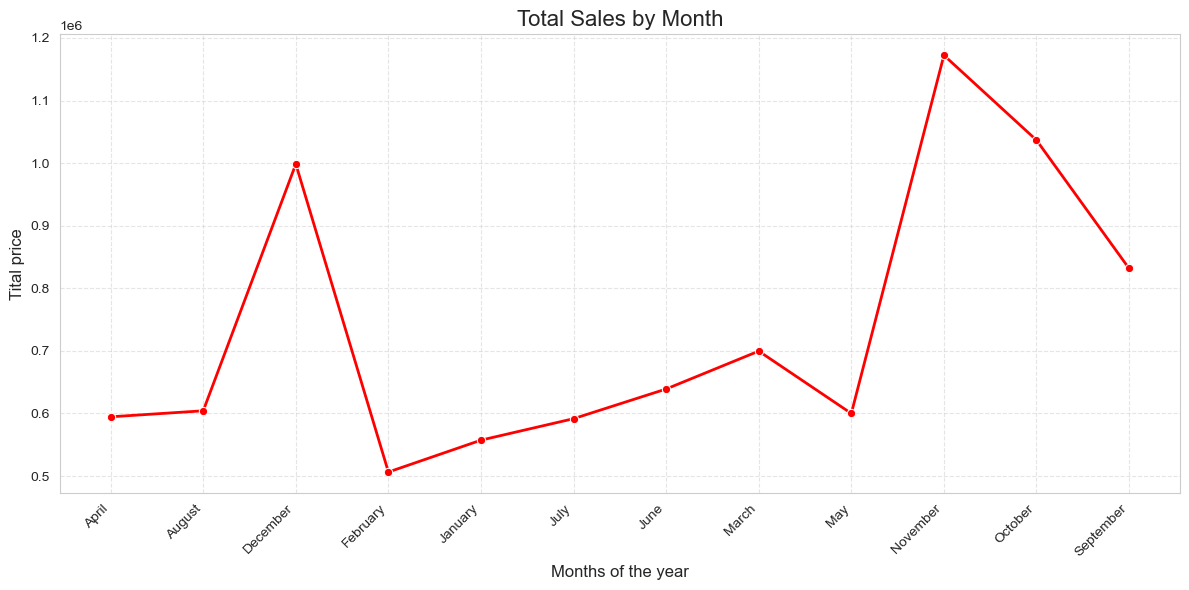

In [33]:
#Plot graph
sns.set_style("whitegrid")

#Plot line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_months, x='month', y='TotalPrice', marker='o', color='red', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Months of the year', fontsize=12)
plt.ylabel('Total price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

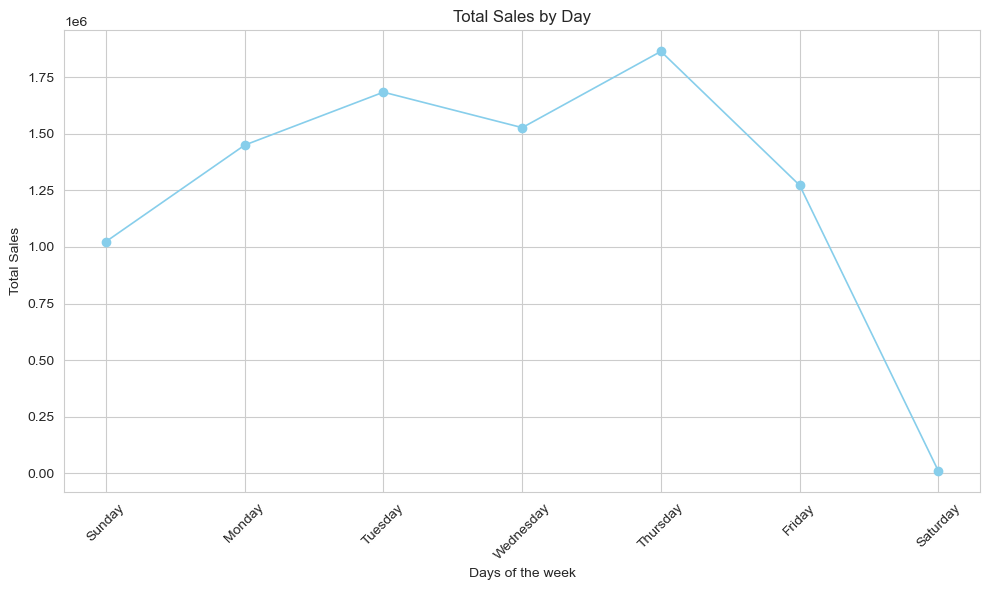

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame containing 'week' and 'Total_sales' columns

# Calculating total sales on a daily basis
daywise = df.groupby('week').agg({'TotalPrice': 'sum'}).reset_index()

# Reordering the table according to weekdays
daywise['week'] = pd.Categorical(daywise['week'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
daywise = daywise.sort_values('week')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(daywise['week'], daywise['TotalPrice'], marker='o', color='skyblue', linewidth=1.2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


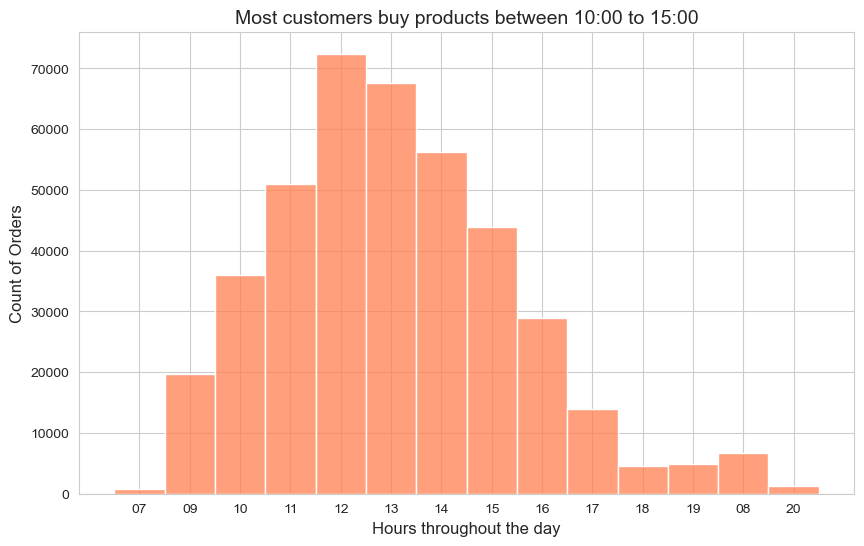

In [38]:
# Set the style
sns.set_style("whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', bins=24, color='coral', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

## Calculating RFM Metrics

### Methodology

How to Use?
RFM analysis is conducted by assigning scores or rankings to each customer based on these three metrics. Customers are then grouped into segments based on their RFM scores. These segments can be utilized to tailor marketing strategies and campaigns to better target and serve the needs of different customer groups.

For example, customers with high RFM scores (recent, frequent, high monetary value) might be offered loyalty programs or special incentives to encourage repeat purchases. On the other hand, customers with low RFM scores (low frequency, low monetary value) might be targeted with re-engagement campaigns to encourage them to make additional purchases.

In [39]:
#last transaction date
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [40]:
# Set a reference date for calculations
today_date = dt.datetime(2010,12,11)

##Group by cutomer ID and aggregate metrics:receny (days since last purchase),
#frequency (number of purchases), monetary (total spend)

df_rfm = df.groupby('Customer ID').agg(
        {'InvoiceDate': lambda date: (today_date - date.max()).days,
         'Invoice': lambda num: num.nunique(),
         'TotalPrice': lambda price: price.sum()})
    

In [41]:
df_rfm.columns = ['recency', 'frequency', "monetary"]  # Rename the aggregated columns
df_rfm.describe().T

count        mean         std      min        25%        50%  \
recency   4312.000000   91.172542   96.861457 1.000000  18.000000  53.000000   
frequency 4312.000000    4.455705    8.170213 1.000000   1.000000   2.000000   
monetary  4312.000000 2048.238236 8914.481280 2.950000 307.987500 706.020000   

                  75%           max  
recency    136.000000    374.000000  
frequency    5.000000    205.000000  
monetary  1723.142500 349164.350000

In [42]:
# Calculate recency score based on quantiles, assigning labels from 1 to 5 (1 being lowest recency)
df_rfm["recency_score"] = pd.qcut(df_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    
# Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest frequency)
df_rfm["frequency_score"] = pd.qcut(df_rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

df_rfm.head()

recency  frequency    monetary recency_score frequency_score
Customer ID                                                               
12346.000000      165         11  372.860000             2               5
12347.000000        3          2 1323.320000             5               2
12348.000000       74          1  222.160000             2               1
12349.000000       43          3 2671.140000             3               3
12351.000000       11          1  300.930000             5               1

In [43]:
# Combine recency and frequency scores to create RFM segment
df_rfm['segment'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)
df_rfm.head()

recency  frequency    monetary recency_score frequency_score  \
Customer ID                                                                  
12346.000000      165         11  372.860000             2               5   
12347.000000        3          2 1323.320000             5               2   
12348.000000       74          1  222.160000             2               1   
12349.000000       43          3 2671.140000             3               3   
12351.000000       11          1  300.930000             5               1   

             segment  
Customer ID           
12346.000000      25  
12347.000000      52  
12348.000000      21  
12349.000000      33  
12351.000000      51

In [44]:
# Mapping of segments to their corresponding customer segments
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
    }

# Map RFM segments to corresponding customer segments using predefined seg_map
df_rfm['segment'] = df_rfm['segment'].replace(seg_map, regex=True)

# Keep only relevant columns and return the resulting dataframe
df_rfm = df_rfm[["recency", "frequency", "monetary", "segment"]]

df_rfm.index = df_rfm.index.astype(int)  # Convert index to integer
df_rfm.head()

recency  frequency    monetary              segment
Customer ID                                                     
12346            165         11  372.860000           cant_loose
12347              3          2 1323.320000  potential_loyalists
12348             74          1  222.160000          hibernating
12349             43          3 2671.140000       need_attention
12351             11          1  300.930000        new_customers

## Dive into RFM segment analysis

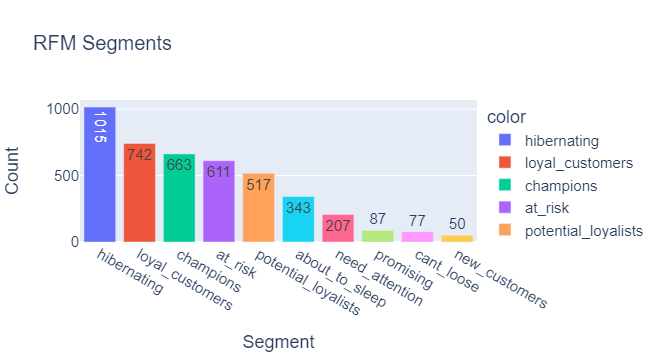

In [46]:
# Get the top 10 most preferred products
segments = df_rfm['segment'].value_counts()

#Create the bar plot
fig= px.bar(x=segments.index,
            y=segments.values,
            color=segments.index,
            text=segments.values,
            title="RFM Segments",
            labels={'x': 'Product', 'y': 'Count'})
# Update layout for better appearance
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)

# Show the plot
fig.show()


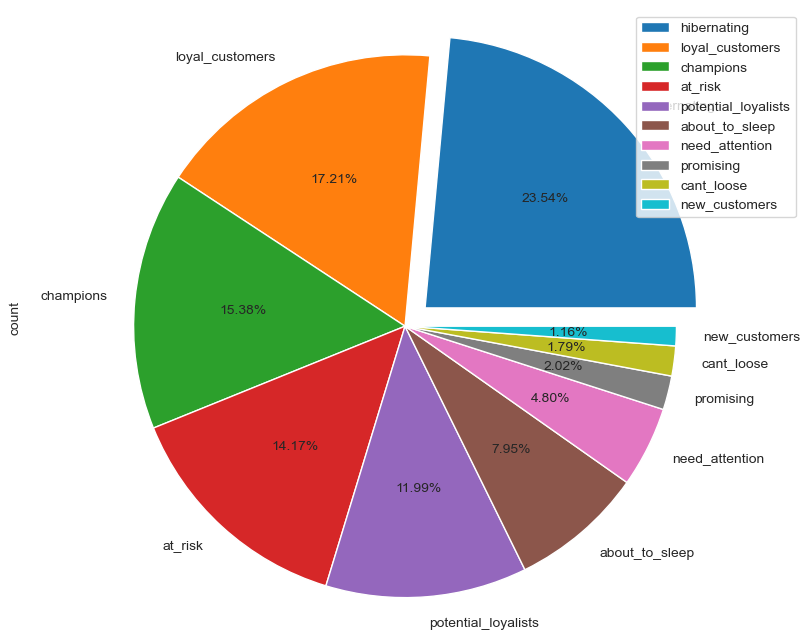

In [52]:
plt.figure(figsize = (10, 8), )
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

segments.plot(kind = 'pie',
            explode = explode,
            autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments.index, loc = "best")
plt.show()

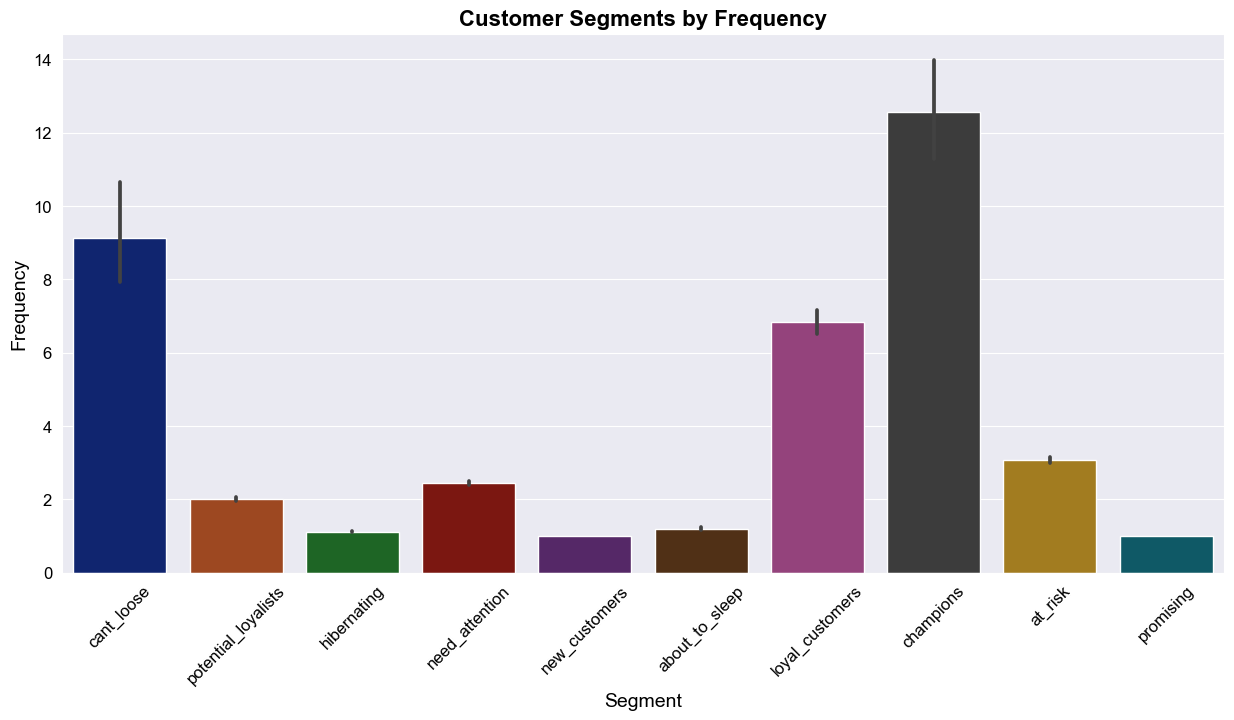

In [53]:
# Set style
sns.set_style("darkgrid")

# Set color palette
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x="segment", y="frequency", data=df_rfm, palette=colors)
plt.title("Customer Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

In [54]:
df_rfm[["segment","recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count","sum"])

recency               frequency              \
                          mean count     sum      mean count   sum   
segment                                                              
about_to_sleep       53.819242   343   18460  1.201166   343   412   
at_risk             152.158756   611   92969  3.073650   611  1878   
cant_loose          124.116883    77    9557  9.116883    77   702   
champions             7.119155   663    4720 12.553544   663  8323   
hibernating         213.885714  1015  217094  1.126108  1015  1143   
loyal_customers      36.287062   742   26925  6.830189   742  5068   
need_attention       53.265700   207   11026  2.449275   207   507   
new_customers         8.580000    50     429  1.000000    50    50   
potential_loyalists  18.793037   517    9716  2.017408   517  1043   
promising            25.747126    87    2240  1.000000    87    87   

                       monetary                       
                           mean count            sum  
segment                                               
about_to_sleep       441.320000   343  151372.760000  
at_risk             1188.878316   611  726404.651000  
cant_loose          4099.450000    77  315657.650000  
champions           6852.264167   663 4543051.143000  
hibernating          403.977836  1015  410037.504000  
loyal_customers     2746.067353   742 2037581.976000  
need_attention      1060.357005   207  219493.900000  
new_customers        386.199200    50   19309.960000  
potential_loyalists  729.510986   517  377157.180000  
promising            367.086782    87   31936.550000

## Customer Segmentation Analysis and Recommendations

## About to Sleep
Mean Recency: 53.819 days (343 customers)

Mean Frequency: 1.201 (412 purchases)

Mean Monetary Value: 441.32 (total: 
151,372.760)

Recommendations:

Offer loyalty rewards or VIP programs to further incentivize their frequent purchases.
Provide exclusive offers or early access to new products/services to maintain their engagement.

## At Risk
Mean Recency: 152.159 days (611 customers)

Mean Frequency: 3.074 (1878 purchases)

Mean Monetary Value:£ 1188.878 (total: £
726,404.651)

## New Customers
Mean Recency: 8.580 days (50 customers)

Mean Frequency: 1.000 (50 purchases)

Mean Monetary Value: £386.199 (total: £19,309.960)

Recommendations:

Welcome them with a special discount or promotion for their next purchase to encourage repeat business.
Implement an onboarding email series to introduce them to your products/services.

## Potential Loyalists
Mean Recency: 18.793 days (517 customers)

Mean Frequency: 2.017 (1043 purchases)

Mean Monetary Value: £729.511 (total:£377,157.180)

Recommendations:

Offer incentives for increasing their frequency of purchases, such as referral bonuses or points-based rewards.
Provide personalized product recommendations based on their past purchases to enhance their shopping experien


## Hibernating

Mean Recency: 213.886 days (1015 customers

Mean Frequency: 1.126 (1143 purchase

)
Mean Monetary Val £403.97(total: £: 
410)


#### 04)
Recommendations:

Reach out with personalized win-back offers or discounts to encourage them to return.
Conduct surveys or feedback sessions to understand why they stopped purchasing and address any concerns.
These recommendations are tailored to each segment's behavior and value, aiming to optimize marketing strategies and improve customer retention and satisfaction.and satisfaction.

Conclusion:

The “At Risk” segment stands out as having the highest total monetary value (£726,404.651), indicating that a significant portion of the company’s revenue comes from customers in this segment.
However, it’s important to note that the “At Risk” segment also has the highest mean recency (152.159 days), suggesting a potential decline in engagement or loyalty among these customers.
Customer Engagement

The company’s success in generating revenue from the “At Risk” segment demonstrates its ability to capitalize on existing customer relationships and generate sales.
However, the high mean recency in this segment indicates a need for proactive measures to prevent churn and retain these valuable customers.